In [ ]:
'''
Script - Do Not Modify

Running this cell will install all the libraries that can be used to solve this
week's Lab. You can make use of any of these libraries to help you in your code.
'''
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please use `cd` command to change the Colab directory to the folder containing this notebook and all other images & data file.

In [ ]:
cd /content/drive/MyDrive/CIS_5810/

/content/drive/MyDrive/CIS_5810


In [ ]:
''' 
Script - Do Not Modify
'''
# Read in Images
orange = Image.open('orange.png')
apple = Image.open('apple.png')

# Input Image as Numpy Arrays
orange = np.array(orange)
apple = np.array(apple)

In [ ]:
'''
Function - Do Not Modify

This function is provided to you to use in your solution. You should not modify 
this function. 
'''
def get_gaussian_kernel(size, sigma):
  '''
  This function returns a gaussian kernel given size and sigma
  Input:
  size - number of rows/cols 
  sigma - standard deviation of the required gaussian kernel 
  Output:
  returns size x size gaussian kernels
  '''
  kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
  kernel /= np.sum(kernel)
  
  return kernel

## `expand()`: Image expansion

In [ ]:
'''
Function - Modify

Fill in the expand function to generate the expanded image
'''
def expand(input_image):
  """
  Input: 
    input_image: (m x n x 1)/(m x n x 3)  - The input image (numpy array)

  Output:
    output - (2m x 2n x 1)/(2m x 2n x 3)  - The output image (numpy array)
  
  Some Important Notes:
   - Keep in mind the 3rd dimension of image can either be 1 or 3 so avoid 
     hard coding values. It is a good practice to take most of the data from 
     the inputs (eg. input_image.shape[2])
   - You can use the helper function 'get_gaussian_kernel' provided above in 
     your program to create the desired gaussian kernel
  """
  # 1) Create the expanded image. 
  #    The new image should be twice the size of the original image.
  #    So, for an n x n image you will create an empty 2n x 2n image
  #    Fill every second row and column with the rows and columns of the original
  #    image
  #    i.e., 1st row of I -> 1st row of expanded image
  #          2nd row of I -> 3rd row of expanded image
  #          3rd row of I -> 5th row of expanded image, and so on
  # 2) Create a Gaussian kernel of size 5x5 and standard deviation equal to 1 
  # 3) Convolve the input image with the filter kernel (NOTE: Remember to multiply the output of the filtering with a factor of 4)
  
  # TODO: IMPLEMENT THIS FUNCTION FROM HERE
  kernel = get_gaussian_kernel(5,1)
  row = input_image.shape[0]
  col = input_image.shape[1]
  thriddimension= input_image.shape[2]
  result = np.zeros((int(row*2), int(col*2), thriddimension)) 
  result[::2,::2,:] = input_image
    
    
  output = 4*signal.convolve(result,kernel[:,:, np.newaxis], mode='same')
  
  
  return output

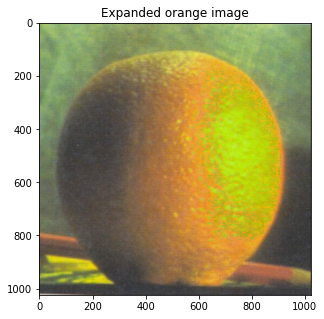

In [ ]:
"""
Script - Do Not Modify

Run this cell to check the correctness of the output from your expand operation
"""
# Note the image size change after expansion
orange_image = expand(orange)
plt.figure(figsize=(5,5))
plt.title('Expanded orange image')
plt.imshow(orange_image.astype(np.uint8))
expand_correct_output = np.load('expand_output.npy')
assert np.allclose(expand_correct_output, orange_image)

## `reduce()`: Image reduction

In [ ]:
'''
Function - Modify

Fill in the reduce function to generate image after gaussian blurring and subsampling
'''
def reduce(input_image):
  '''
  Input: 
    input_image: (m x n x 1)/(m x n x 3)  - The input image

  Output:
    output: the reduced image after gaussian blurring and subsampling operation
  '''
  # 1) Create a Gaussian kernel of size 5x5 and 
  #    standard deviation equal to 1 
  #
  # 2) Convolve the input image with the filter kernel
  # Tip: Use the default settings of imfilter
  #
  # 3) Subsample the image by a factor of 2
  # i.e., keep only 1st, 3rd, 5th, .. rows and columns
  # 
  # Some Important Notes:
  # - Keep in mind the 3rd dimension of image can either be 1 or 3 so avoid 
  #   hard coding values. It is a good practice to take most of the data from 
  #   the inputs (eg. input_image.shape[2])

  # TODO: IMPLEMENT THIS FUNCTION FROM HERE

  kernel = get_gaussian_kernel(5,1)
  result = signal.convolve(input_image, kernel[:,:,None], mode='same')
  # result = signal.convolve(apple,kernel[:, : , None], mode='same' )
  row= result.shape[0]
  col= result.shape[1]
  thriddimension = result.shape[2]

  # output = np.zeros((row/2, col/2, thriddimension))

  output= result[::2,::2, :]


  return output

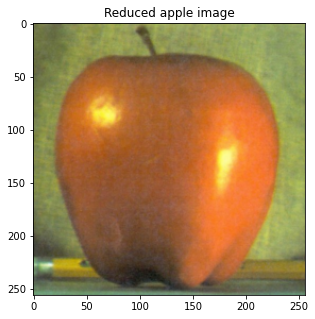

In [ ]:
"""
Script - Do Not Modify

Run this cell to check the correctness of the output from your reduce operation
"""
# Check reduction result for apple image (Note the image size change after reduction)
apple_image = reduce(apple)
plt.figure(figsize=(5,5))
plt.title('Reduced apple image')
plt.imshow(apple_image.astype(np.uint8))
reduce_correct_output1 = np.load('reduce_output1.npy')
assert np.allclose(reduce_correct_output1, apple_image)

# Check reduction result for randomly generated image
black_and_white = np.zeros((512,512, 1), dtype=float)
black_and_white[:,257:512, :]=1
black_and_white_image = reduce(black_and_white)
black_and_white_image = np.squeeze(black_and_white_image)
reduce_correct_output2 = np.load('reduce_output2.npy')
assert(np.allclose(reduce_correct_output2, black_and_white_image))

## `gaussian_pyramid()`

In [ ]:
'''
Function - Modify

Fill in the gaussian_pyramid function to return the gaussian pyramid of the 
input image according to the number of depth levels
'''
def gaussian_pyramid(input_image, depth):
  """
  Input:
  input_image: (m x n x 3)/(m x n x 1) - The input image
  depth: number of levels of the Gaussian pyramid
  
  Output: 
  G: A numpy object array containing all the levels of the 
  Gaussian pyramid such that the lowest level (G[0]) is the input
  image, and all other levels (G[n]) is the reduced version of 
  level under it (G[n-1]).
  """
  
  # TODO: IMPLEMENT THIS FUNCTION FROM HERE
  G = np.empty((depth), dtype=object)
  G[0]= input_image
  for i in range(1,depth):
    G[i] = reduce(G[i-1]) 

  return G

In [ ]:
'''
Test - Do not modify

Test Gaussian Pyramid Function (Just Check the Last Layer)
'''
depth = 5
gP = gaussian_pyramid(orange, depth)
gaussian_pyramid_output = np.load('gaussian_pyramid_layer.npy')
assert(np.allclose(gaussian_pyramid_output, gP[4]))

## `laplacian_pyramid()`

In [ ]:
'''
Function - Modify

Fill in the laplacian_pyramid function that returns the laplacian pyramid of 
the input image according to the number of depth levels  
'''
def laplacian_pyramid(input_image, depth):
  """
  Input:
  input_image: (m x n x 1)/(m x n x 3) - The input image
  depth: number of levels of the Laplacian pyramid
  Output:
  L: a numpy object array containing all the levels of the Laplacian pyramid.
  """
  # 1) Create a Gaussian pyramid
  #    Use the function you already created.

  # 2) Create a pyramid, where each level (L[n]) is the corresponding level of
  #    the Gaussian pyramid (G[n]) minus the expanded version of the level above 
  #    it (G[n-1]). Remember that the last level of the Laplacian pyramid is the 
  #    same as the last level of the Gaussian pyramid.
   
  # TODO: IMPLEMENT THIS FUNCTION FROM HERE
  L = np.empty((depth), dtype=object)
  G = gaussian_pyramid(input_image, depth)
  
  
  
  for i in range(0,depth-1):
    L[i]= np.array(G[i] - expand(G[i+1]))
    
  L[depth-1] = G[depth-1]
  return L

In [ ]:
'''
Test - Do Not Modify

Test Laplacian Pyramid Function (Check the Last Layer and First Layer)
'''
depth = 5
lP = laplacian_pyramid(orange, depth)
laplacian_pyramid_output0 = np.load('laplacian_pyramid_layer0.npy')
laplacian_pyramid_output4 = np.load('laplacian_pyramid_layer4.npy')
assert(np.allclose(laplacian_pyramid_output4, lP[4]))
assert(np.allclose(laplacian_pyramid_output0, lP[0]))

## `expand()`

In [ ]:
'''
Function - Modify

Fill in the combine function that returns the combined Laplacian Pyramid of two 
input images over the Gaussian Pyramid in the selected region
'''
def combine(LA, LB, GR):
  """
  Input:
  LA: the Laplacian pyramid of the first image
  LB: the Laplacian pyramid of the second image
  GR: Gaussian pyramid of the selected region
  Output:
  LS: a numpy object array containing combined Laplacian pyramid
  """
  # 1) Find the depth of the pyramid and create an empty pyramid LS
  #
  # 2) For every level d in LS, and every pixel (i,j) the output for the 
  #    combined Laplacian pyramid is of the form:
  #    LS(d,i,j) = GR(d,i,j)*LA(d,i,j) + (1-GR(d,i,j))*LB(d,i,j)
  
  # TODO: IMPLEMENT THIS FUNCTION FROM HERE
  
  depth = LA.shape[0]
  LS = np.empty((depth), dtype=object)
  # LA= laplacian_pyramid(LA,depth)
  # LB= laplacian_pyramid(LB,depth)
  # GR = gaussian_pyramid(GR,depth)
  x = GR.shape
  
  z= np.ones(x)
  for i in range (depth):
    LS[i] = (GR[i]*LA[i]) + ((1- GR[i])* LB[i])


  return LS

In [ ]:
'''
Script - Do Not Modify

This script below runs all the functions you have implemented till now. Use this
to check if you are getting any errors in the combine function
'''
# Read in images
orange = Image.open('orange.png')
orange = np.array(orange)
apple = Image.open('apple.png')
apple = np.array(apple)

black_and_white = np.zeros((512,512, 1), dtype=float)
black_and_white[:,257:512, :]=1

# depth of the pyramids
depth = 5

# 1) we build the Laplacian pyramids of the two images
Lorange = laplacian_pyramid(orange,depth)
Lapple = laplacian_pyramid(apple,depth)

# 2) we build the Gaussian pyramid of the selected region
Gblack_and_white = gaussian_pyramid(black_and_white,depth)

# 3) we combine the two pyramids using the nodes of GR as weights  
LS = combine(Lorange, Lapple, Gblack_and_white)

combine_output = np.load('combine_output.npy')
assert np.allclose(combine_output, LS[4])

## `collapse()`

In [ ]:
'''
Function - Modify

Fill in the collapse function that collapses the laplacian pyramid and 
returns the recovered image
'''
def collapse(laplacian_pyramid):
  """
  Input:
  laplacian_pyramid: the Laplacian pyramid of an image
  Output:
  I: The Recovered image from the Laplacian pyramid (Instead of building a Laplacian
  pyramid from an image, now we want to retrieve the input image given its laplacian pyramid)
  """
  # TODO: IMPLEMENT THIS FUNCTION FROM HERE
  depth = LS.shape[0]
  I=np.empty((depth), dtype=object)
  I[depth-1] = LS[depth-1]
  
  for i in range(depth-2,-1,-1):
    I[i] =  expand(I[i+1]) + LS[i] 
   

  I = I[0]
  
  return I

AssertionError: ignored

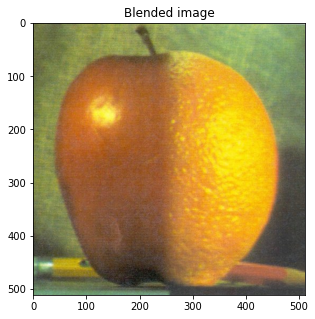

In [ ]:
'''
Script - Do Not Modify

The script below runs this entire lab to get a blended output of the two images.
'''
orange = Image.open('orange.png')
orange = np.array(orange)
apple = Image.open('apple.png')
apple = np.array(apple)

# Used to define the way we are merging the two images
black_and_white = np.zeros((512,512, 1), dtype=float)
black_and_white[:,257:512, :]=1

# depth of the pyramids
depth = 5

# 1) we build the Laplacian pyramids of the two images
Lorange = laplacian_pyramid(orange,depth)
Lapple = laplacian_pyramid(apple,depth)

# 2) we build the Gaussian pyramid of the selected region
Gblack_and_white = gaussian_pyramid(black_and_white,depth)
  
# 3) we combine the two pyramids using the nodes of GR as weights  
LS = combine(Lorange, Lapple, Gblack_and_white)

# 4) we collapse the output pyramid to get the final blended image
blended_image = collapse(LS).astype(np.uint8)

# 5) Visualize the blended image
plt.figure(figsize=(5,5))
plt.title('Blended image')
plt.imshow(blended_image.astype(np.uint8))

blended_image_output = np.load('blended_image_output.npy')
assert np.allclose(blended_image_output, blended_image)

Remember to run the cell below to save the blended image result and submit it along with this notebook file to Gradescope

In [ ]:
'''
Script - Do Not Modify

Run this cell to download the images to your local machine.
'''
from google.colab import files
blended_image = Image.fromarray(blended_image.astype(np.uint8))
blended_image.save('blended_image.png')
files.download('blended_image.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>